In [1]:
from gym import make
from agent import Agent
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
sns.set()

from itertools import product

In [2]:
def plot(log):
    fig, ax = plt.subplots(figsize=(12, 8))
    cfg = (f'alpha: {log["alpha"][0]} | '
           f'gamma: {log["gamma"][0]} | '
           f'sigma_max: {log["sigma_max"][0]} | '
           f'buffer: {log["buffer_size"][0]} | '
           f'batch: {log["batch_size"][0]} | '
           f'tau: {log["tau"][0]} | '
           f'shaping: {log["shaping_coef"][0]}')
    ax.set_title(f"{cfg}")
    ax.set_xlabel("№ of transitions")
    ax.set_ylabel("Mean reward")

    plt.hlines(90, np.min(log["step"]), np.max(log["step"]),
               colors="r", label="Solved")

    plt.plot(log["step"],
             log["reward_mean"],
             label="DDPG")

    plt.fill_between(log["step"],
                     log["reward_mean"] - log["reward_std"],
                     log["reward_mean"] + log["reward_std"],
                     alpha=0.5)
    plt.legend()
    plt.show()

def collect_data(alpha, gamma, sigma_max, sigma_min,
                 start_training,
                 buffer_size,
                 batch_size,
                 hidden_size,
                 shaping,
                 tau):
    env = make("MountainCarContinuous-v0")
    agent = Agent(env,
                  alpha=alpha,
                  gamma=gamma,
                  hidden_size=hidden_size,
                  tau=tau)
    return agent, pd.DataFrame(agent.train(200_000,
                                           sigma_max=sigma_max,
                                           sigma_min=sigma_min,
                                           buffer_size=buffer_size,
                                           batch_size=batch_size,
                                           shaping_coef=shaping,
                                           start_training=start_training,
                                           ))

def print_info(log):
    r_max_idx = np.argmax(log["reward_mean"])
    print(f"Max reward {log['reward_mean'][r_max_idx]} @ {log['step'][r_max_idx]}")

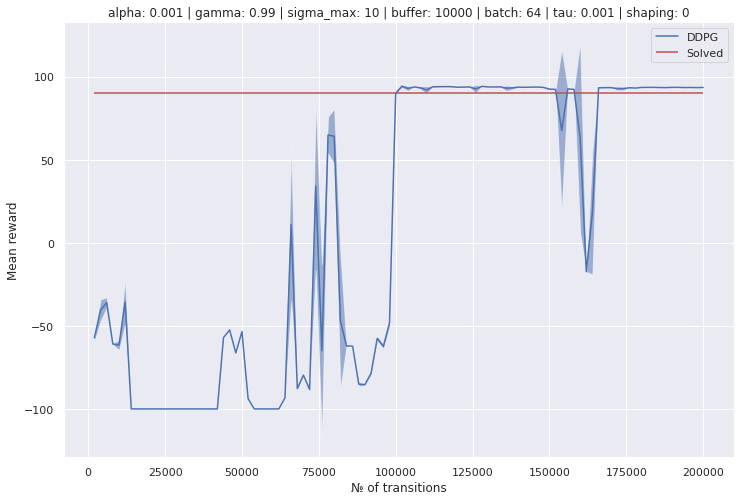

(93.51802190821866, 0.021287304726666952)
Max reward 94.28608887553484 @ 101999


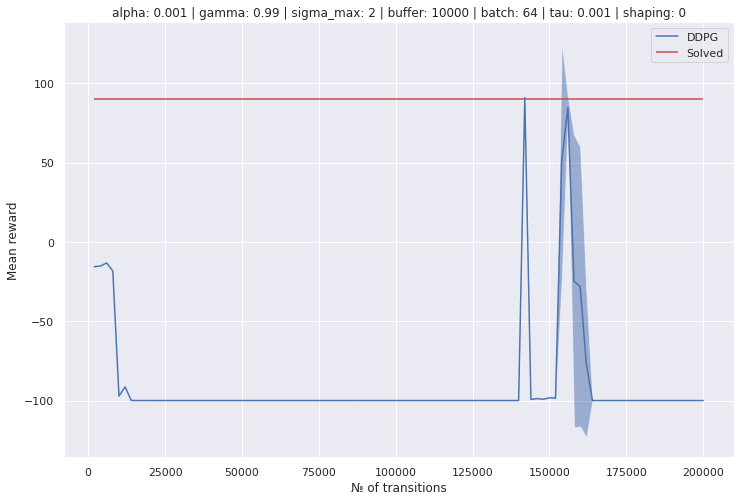

(-99.89999999999856, 4.263256414560601e-14)
Max reward 90.95779429019055 @ 141999


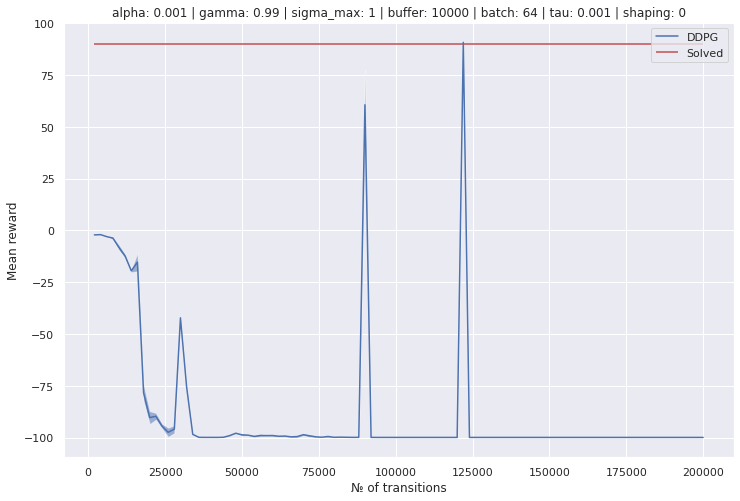

(-99.89999755942766, 5.221247238879302e-06)
Max reward 90.75508630870083 @ 121999


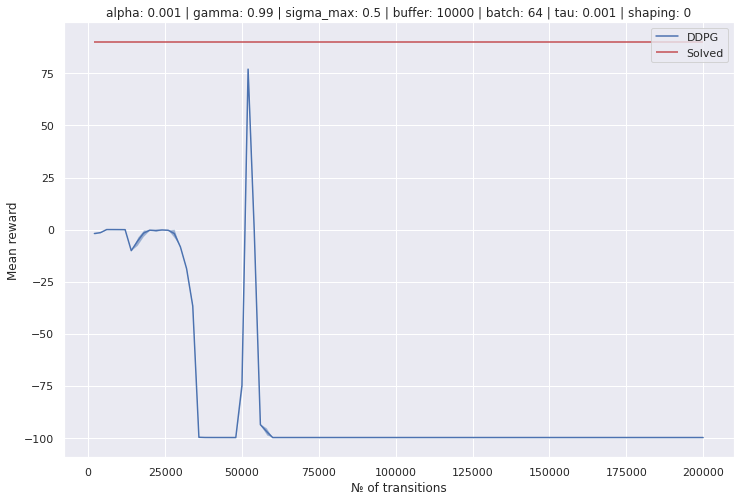

(-99.89999999785279, 9.137995666369082e-09)
Max reward 77.05489637490624 @ 51999


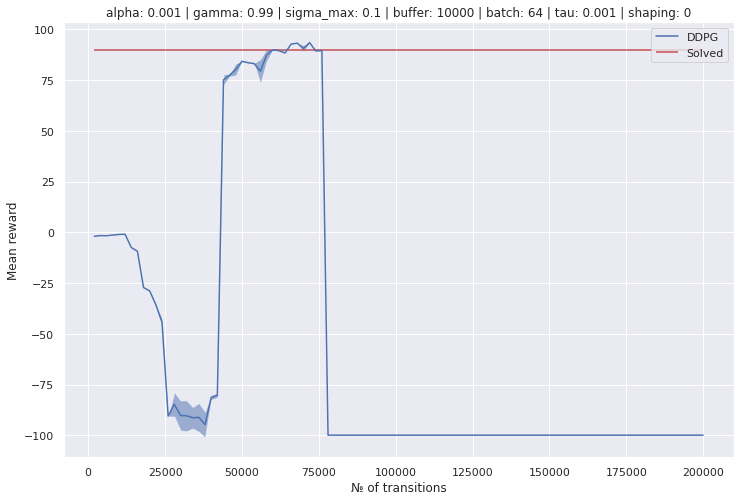

(-99.89999999999856, 4.263256414560601e-14)
Max reward 93.51766635594247 @ 71999


In [3]:
configs = []

for sigma_max in (10, 2, 1, 0.5, 0.1):
    configs.append(
        {
            "alpha": 1e-3,
            "gamma": 0.99,
            "buffer_size": 10000,
            "batch_size": 64,
            "start_training": 1000,
            "sigma_max": sigma_max,
            "sigma_min": 0.,
            "hidden_size": 32,
            "shaping": 0,
            "tau": 1e-3
        }
    )

cdd = joblib.delayed(collect_data)
outs = joblib.Parallel(n_jobs=5)(cdd(**config) for config in configs)

for agent, log in outs:
    plot(log)
    print(agent.evaluate_policy(episodes=100))
    print_info(log)

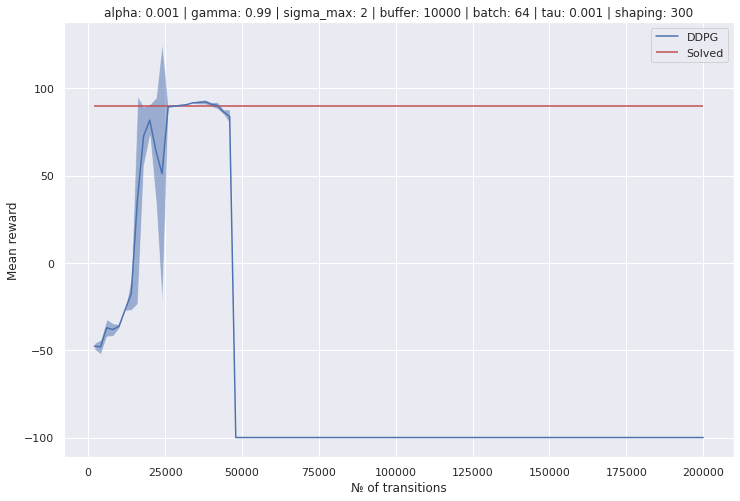

(-99.89999999999856, 4.263256414560601e-14)
Max reward 92.23056651948676 @ 37999


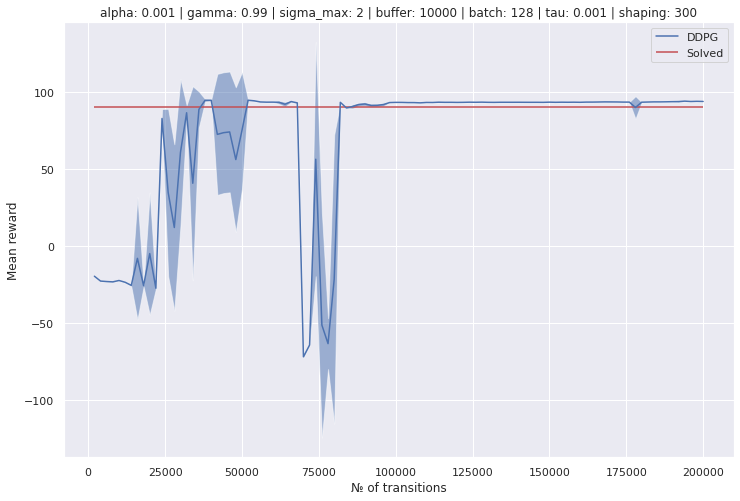

(93.7569069001514, 0.049170836822880835)
Max reward 94.5847697246335 @ 51999


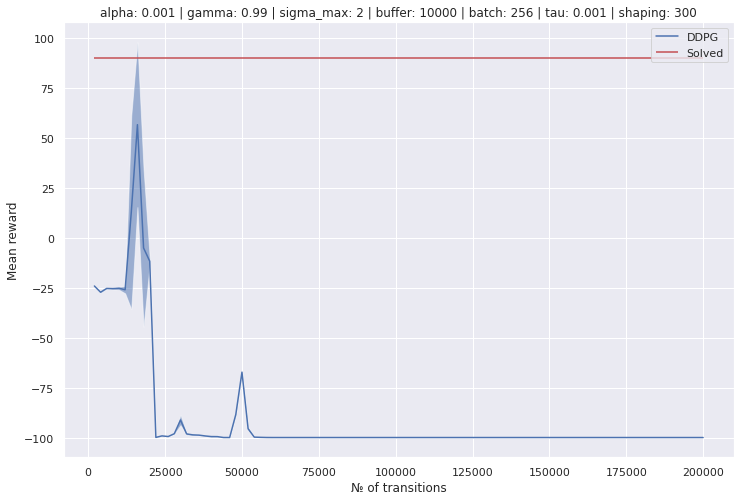

(-99.89999999999856, 4.263256414560601e-14)
Max reward 56.80242179572124 @ 15999


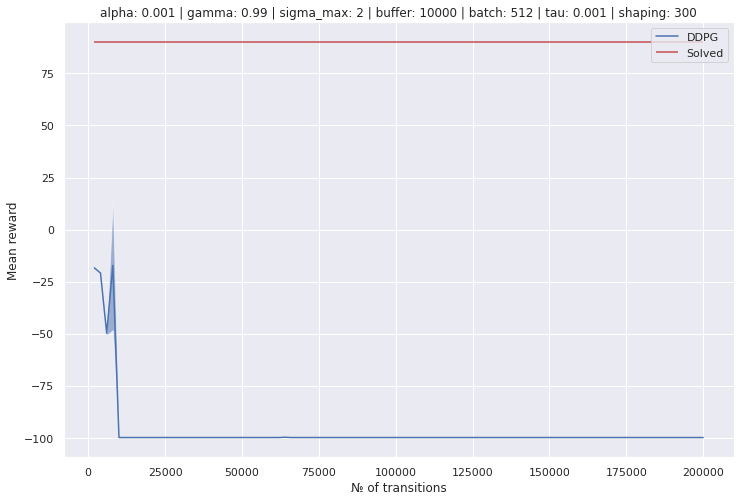

(-99.89999999999856, 4.263256414560601e-14)
Max reward -17.24306383177659 @ 7999


In [4]:
configs = []

for batch_size in (64, 128, 256, 512):
    configs.append(
        {
            "alpha": 1e-3,
            "gamma": 0.99,
            "buffer_size": 10000,
            "batch_size": batch_size,
            "start_training": 1000,
            "sigma_max": 2,
            "sigma_min": 0.,
            "hidden_size": 32,
            "shaping": 300,
            "tau": 1e-3
        }
    )

cdd = joblib.delayed(collect_data)
outs = joblib.Parallel(n_jobs=4)(cdd(**config) for config in configs)

for agent, log in outs:
    plot(log)
    print(agent.evaluate_policy(episodes=100))
    print_info(log)

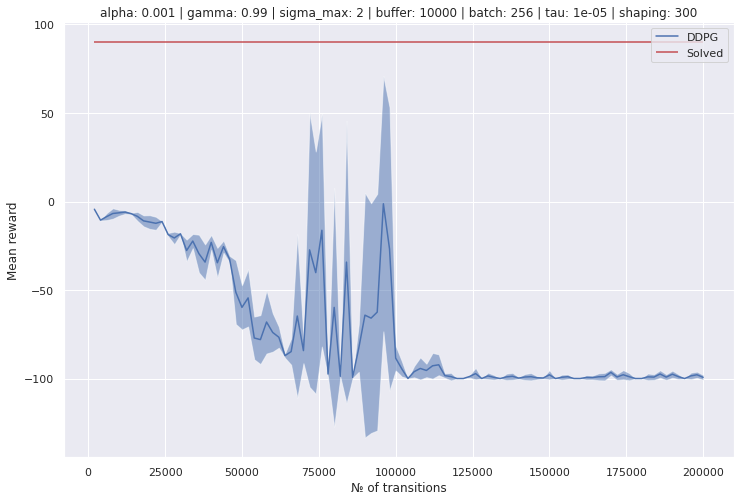

(-99.2001738691552, 1.3710015467593457)
Max reward -1.2162213048712587 @ 95999


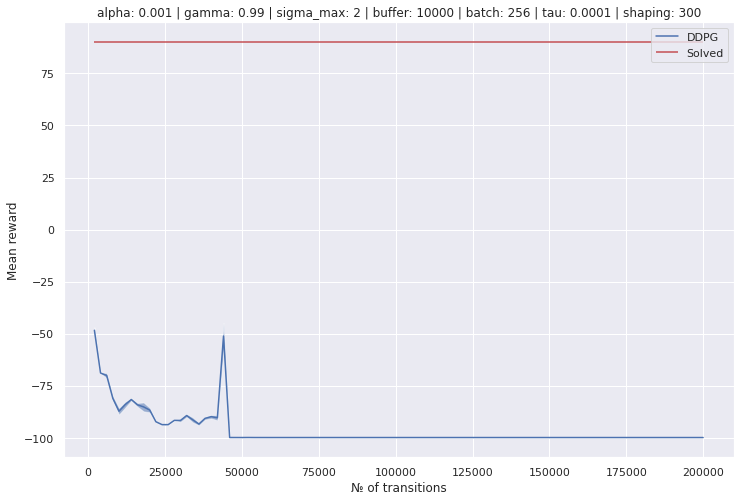

(-99.89999999999856, 4.263256414560601e-14)
Max reward -48.368188621325544 @ 1999


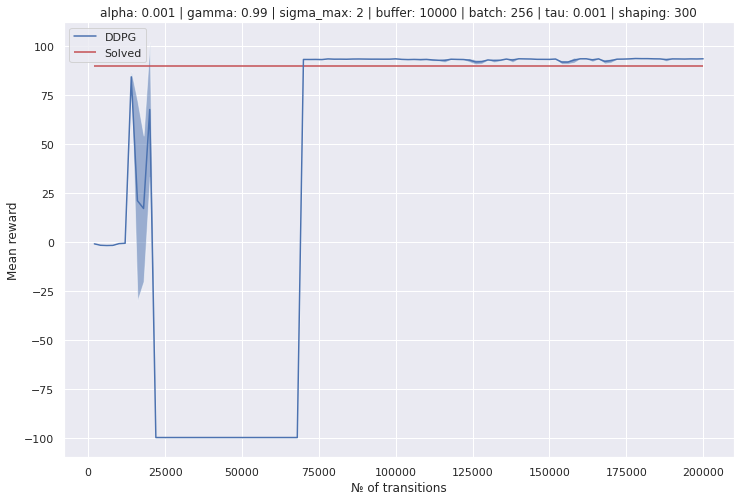

(92.9058239303911, 1.500612033185351)
Max reward 93.77454503106671 @ 177999


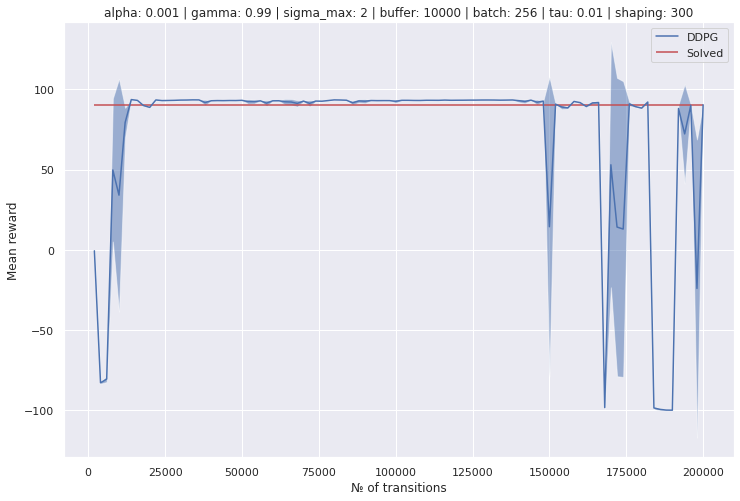

(55.49967833576707, 73.1369923636052)
Max reward 93.55356689654488 @ 13999


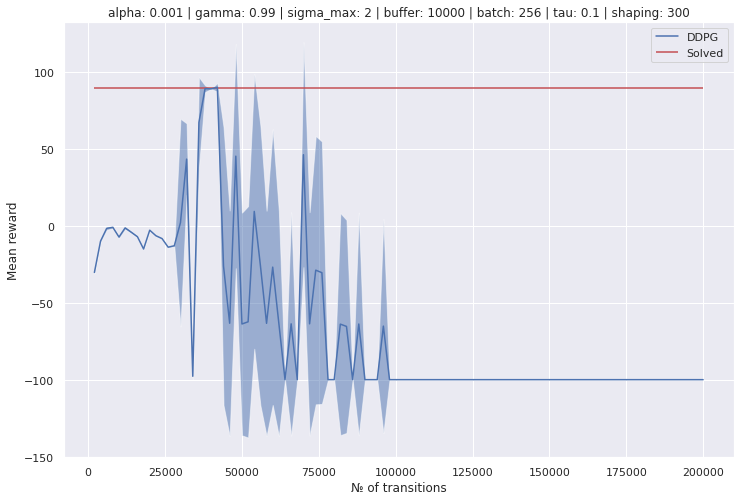

(-99.89999999999856, 4.263256414560601e-14)
Max reward 90.1288519742027 @ 41999


In [5]:
configs = []

for tau in (1e-5, 1e-4, 1e-3, 1e-2, 1e-1):
    configs.append(
        {
            "alpha": 1e-3,
            "gamma": 0.99,
            "buffer_size": 10000,
            "batch_size": 256,
            "start_training": 1000,
            "sigma_max": 2,
            "sigma_min": 0.,
            "hidden_size": 32,
            "shaping": 300,
            "tau": tau
        }
    )

cdd = joblib.delayed(collect_data)
outs = joblib.Parallel(n_jobs=5)(cdd(**config) for config in configs)

for agent, log in outs:
    plot(log)
    print(agent.evaluate_policy(episodes=100))
    print_info(log)

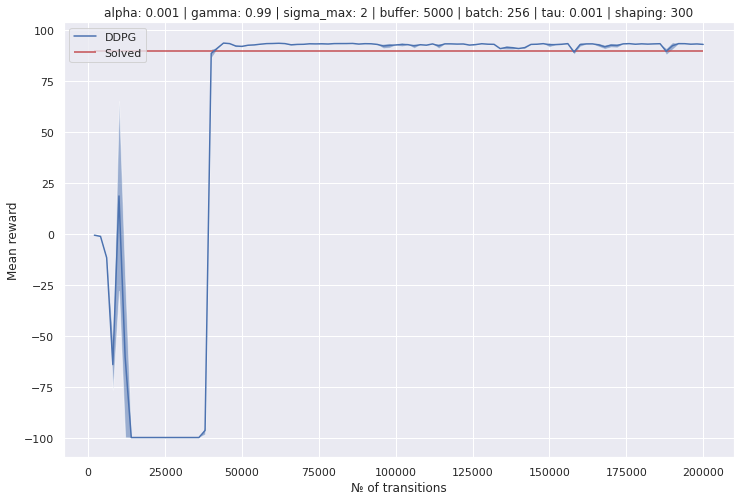

(93.00561765187962, 0.07711592772764296)
Max reward 93.67486260553099 @ 43999


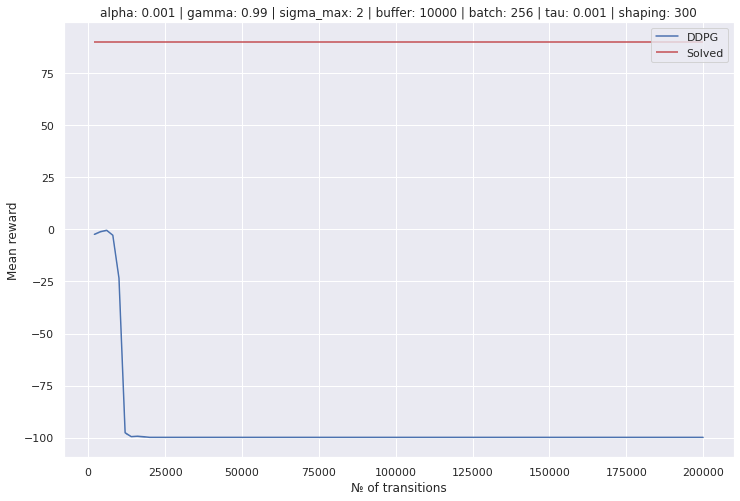

(-99.89999999999856, 4.263256414560601e-14)
Max reward -0.40448533375458984 @ 5999


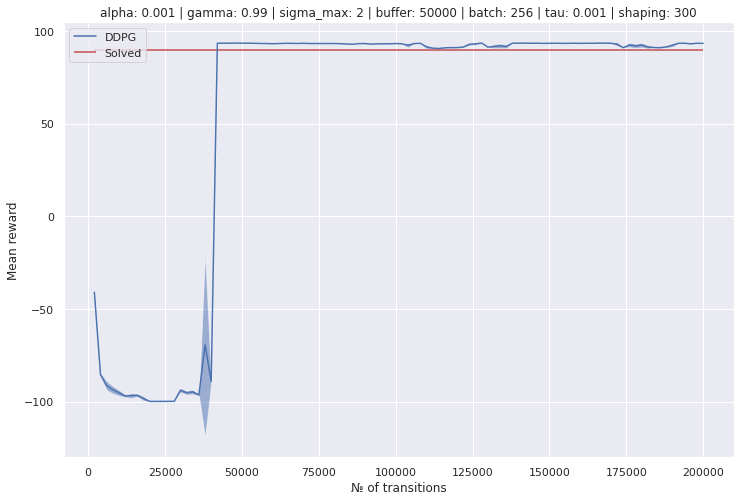

(93.35498668386943, 0.10174062500030336)
Max reward 93.49899462454252 @ 47999


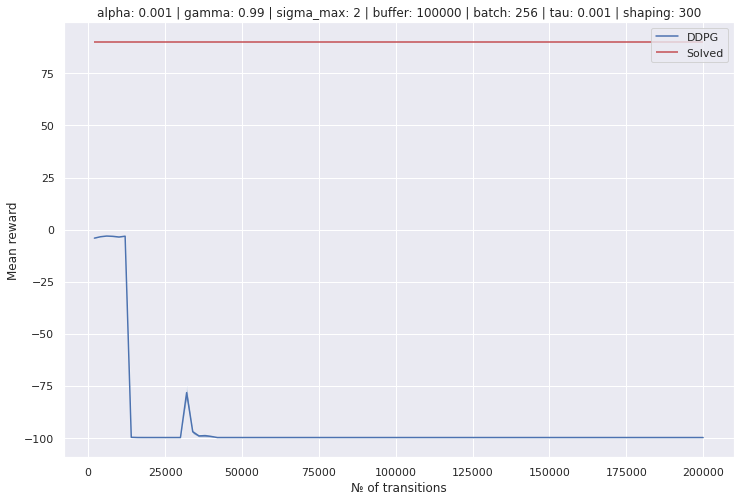

(-99.89999999999856, 4.263256414560601e-14)
Max reward -3.1181383228294988 @ 5999


In [6]:
configs = []

for buffer_size in (5000, 10000, 50000, 100000):
    configs.append(
        {
            "alpha": 1e-3,
            "gamma": 0.99,
            "buffer_size": buffer_size,
            "batch_size": 256,
            "start_training": 1000,
            "sigma_max": 2,
            "sigma_min": 0.,
            "hidden_size": 32,
            "shaping": 300,
            "tau": 1e-3
        }
    )

cdd = joblib.delayed(collect_data)
outs = joblib.Parallel(n_jobs=4)(cdd(**config) for config in configs)

for agent, log in outs:
    plot(log)
    print(agent.evaluate_policy(episodes=100))
    print_info(log)

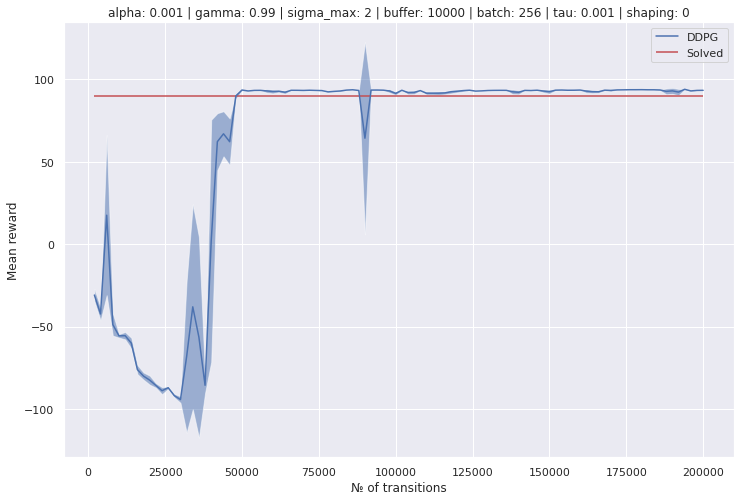

(93.32177724030866, 0.08859073385486523)
Max reward 93.94448969490286 @ 193999


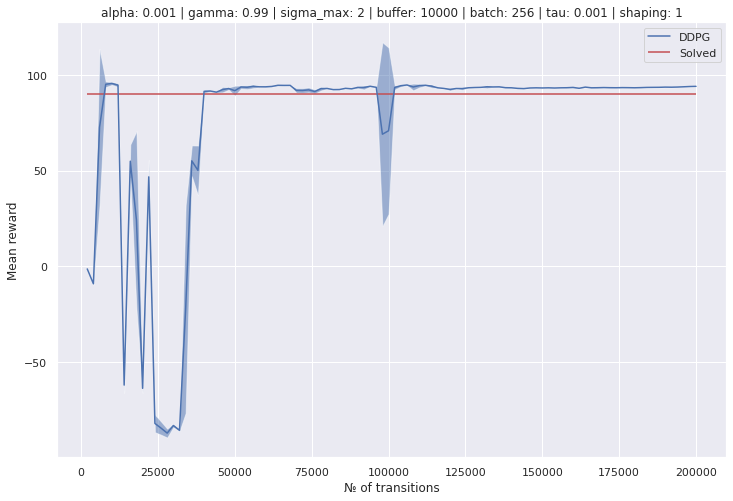

(94.07018017726385, 0.05031988939919783)
Max reward 95.59356688778249 @ 9999


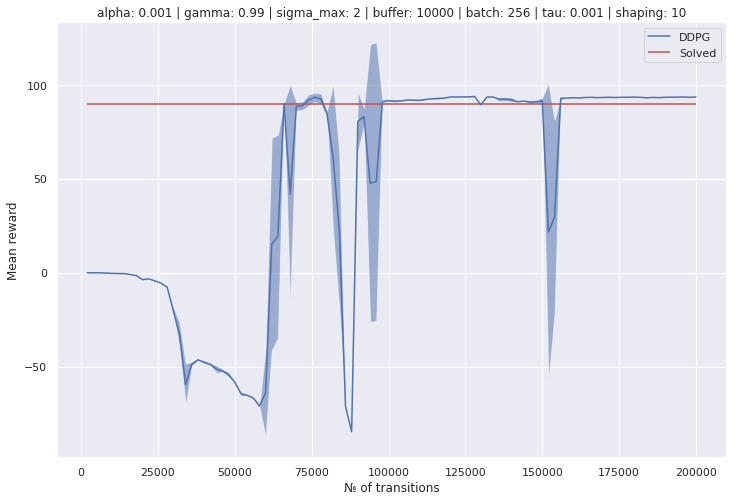

(92.52322065024075, 1.7925658952015908)
Max reward 93.76525948563886 @ 127999


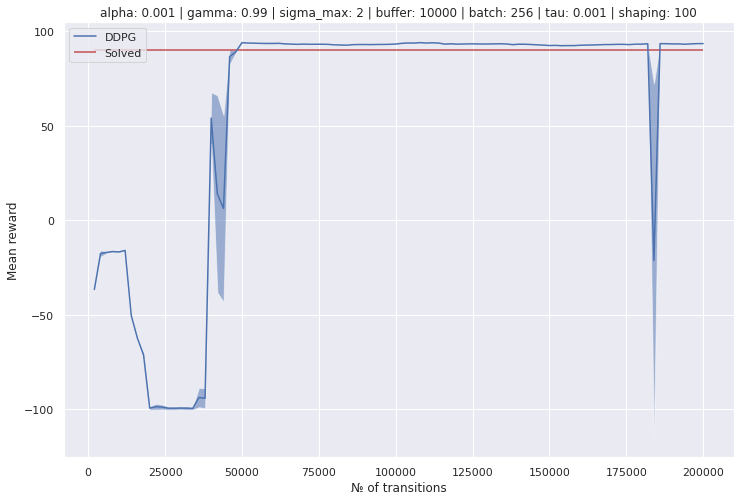

(93.57702406589145, 0.02784742725379481)
Max reward 94.10454199231569 @ 107999


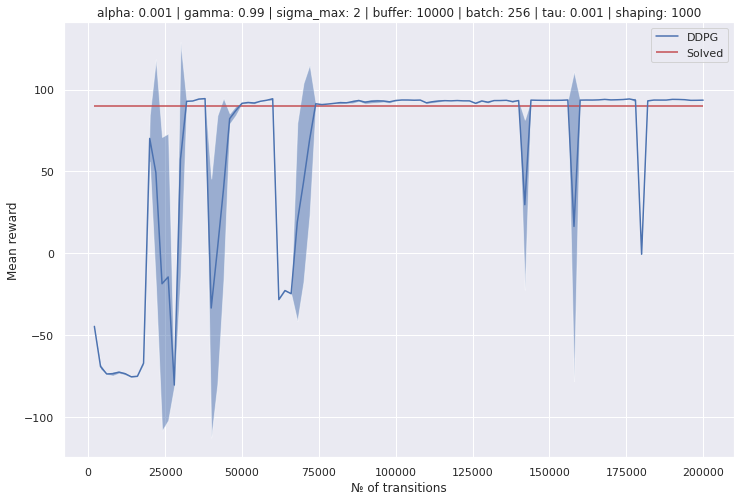

(93.29193507093325, 0.9014198725231167)
Max reward 94.42536030656835 @ 37999


In [7]:
configs = []

for shaping in (0, 1, 10, 100, 1000):
    configs.append(
        {
            "alpha": 1e-3,
            "gamma": 0.99,
            "buffer_size": 10000,
            "batch_size": 256,
            "start_training": 1000,
            "sigma_max": 2,
            "sigma_min": 0.,
            "hidden_size": 32,
            "shaping": shaping,
            "tau": 1e-3
        }
    )

cdd = joblib.delayed(collect_data)
outs = joblib.Parallel(n_jobs=5)(cdd(**config) for config in configs)

for agent, log in outs:
    plot(log)
    print(agent.evaluate_policy(episodes=100))
    print_info(log)

step: 200000 | Rmean = 93.3749 | Rstd = 0.0289: 100%|██████████| 200000/200000 [23:07<00:00, 144.09it/s]


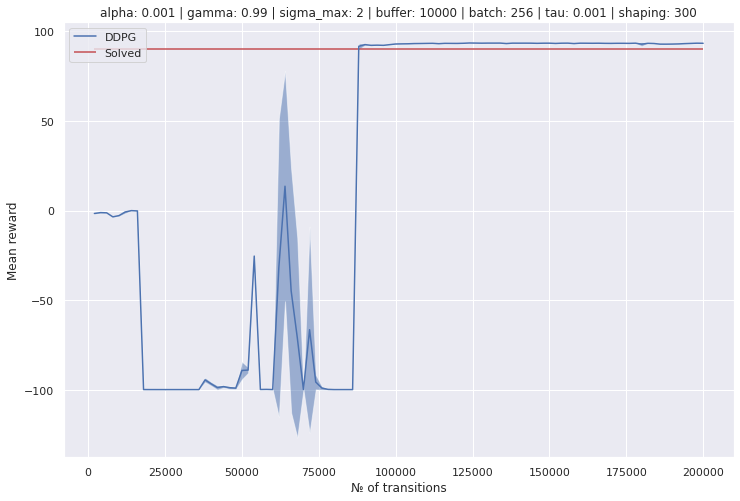

Max reward 93.53961795081122 @ 123999


(37.29820746885423, 85.69675530163757)

In [8]:
config = {
    "alpha": 1e-3,
    "gamma": 0.99,
    "buffer_size": 10000,
    "batch_size": 256,
    "start_training": 1000,
    "sigma_max": 2,  # +
    "sigma_min": 0.,
    "hidden_size": 32,
    "shaping": 300,
    "tau": 1e-3
}

agent, log = collect_data(**config)
plot(log)
print_info(log)
agent.evaluate_policy(100)


С болью удалось добиться стабильности в обучении машинки в ddpg подходе. Последний эксперимент проведен не на самых лучших значениях гиперпараметров. Очевидно, что тут можно долго играться с различными параметрами, но ясно, что в целом кумулятивная награда упирается примерно в значение 95.